In [95]:
#Importing part of libraries into the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process.kernels import RBF

In [96]:
#Dataset Implementation part
df=pd.read_csv("StressLevelDataset.csv")

In [97]:
#retutrns number of rows and columns in the dataset
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


(array([373.,   0.,   0.,   0.,   0., 358.,   0.,   0.,   0., 369.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

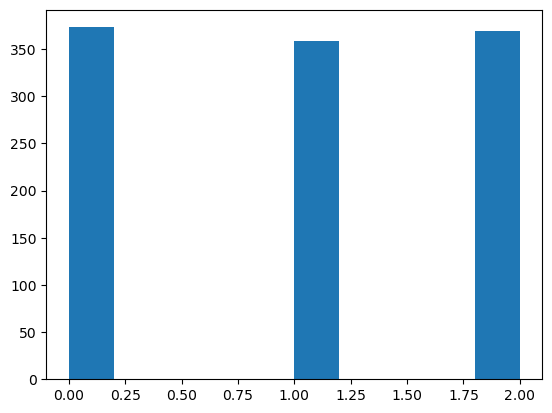

In [98]:
#Checking target value count
plt.hist(df['stress_level'])

In [99]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [100]:
#description of the dataframe
df.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


In [101]:
#structure of the dataset
df.shape

(1100, 21)

In [102]:
#finding the unique values in each column
df.nunique()

anxiety_level                   22
self_esteem                     31
mental_health_history            2
depression                      28
headache                         6
blood_pressure                   3
sleep_quality                    6
breathing_problem                6
noise_level                      6
living_conditions                6
safety                           6
basic_needs                      6
academic_performance             6
study_load                       6
teacher_student_relationship     6
future_career_concerns           6
social_support                   4
peer_pressure                    6
extracurricular_activities       6
bullying                         6
stress_level                     3
dtype: int64

In [103]:
#checking the null values
df.isnull()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1096,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1097,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1098,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [104]:
#printing missing values
missing_values = df.isnull().sum()
print(missing_values)

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64


In [105]:
#fitting independent value in X and dependent value in y
X = df.iloc[:,:-1]
y = df["stress_level"]

<function matplotlib.pyplot.show(close=None, block=None)>

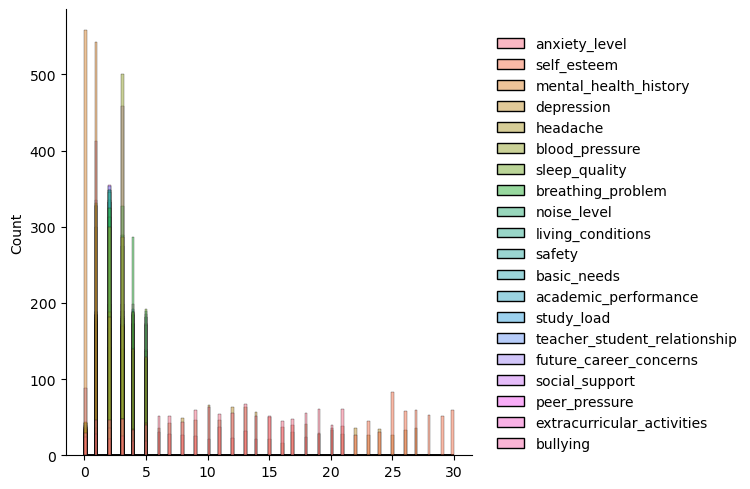

In [106]:
#displot graph
sns.displot(X)
plt.show

In [107]:
#printing all the input values 
print(X)

      anxiety_level  self_esteem  mental_health_history  depression  headache  \
0                14           20                      0          11         2   
1                15            8                      1          15         5   
2                12           18                      1          14         2   
3                16           12                      1          15         4   
4                16           28                      0           7         2   
...             ...          ...                    ...         ...       ...   
1095             11           17                      0          14         3   
1096              9           12                      0           8         0   
1097              4           26                      0           3         1   
1098             21            0                      1          19         5   
1099             18            6                      1          15         3   

      blood_pressure  sleep

<Axes: >

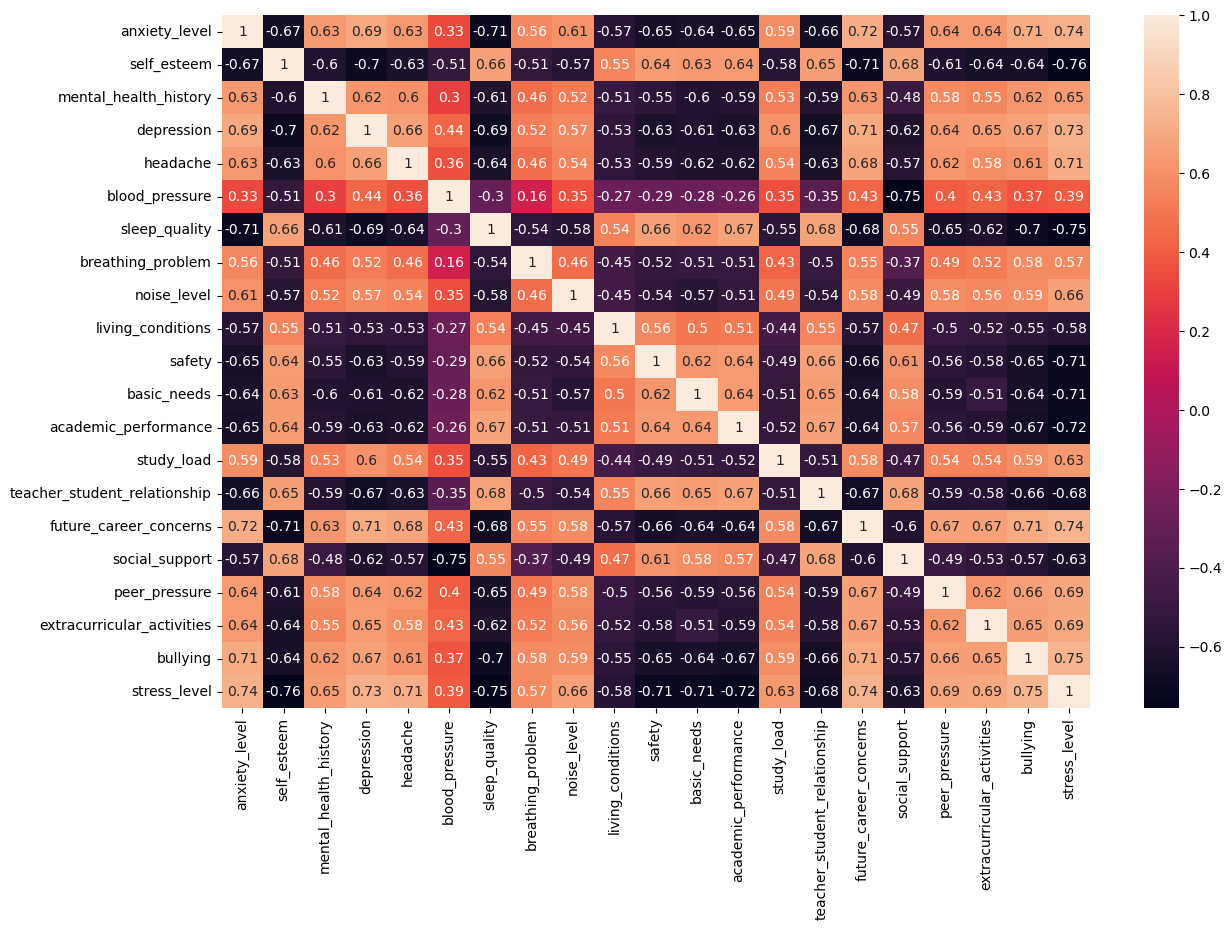

In [108]:
#heatmap graph
hm = df.corr()
fig = plt.figure(figsize=(14,9))
sns.heatmap(hm,annot=True)

In [109]:
#count of rows where academic performance is less than 4
len(df[df['academic_performance'] < 4])

730

In [110]:
#count of academic performance
academic_performance_counts = df['academic_performance'].value_counts()

# Creating a DataFrame for plotting
academic_performance_counts_df = pd.DataFrame({'academic_performance Score': academic_performance_counts.index, 'Count': academic_performance_counts.values})

# Plotting with Plotly Express
fig = px.bar(academic_performance_counts_df, x='academic_performance Score', y='Count',
             title='Count of academic_performance Scores',
             labels={'academic_performance Score': 'academic_performance Score', 'Count': 'Count'})

fig.update_layout(xaxis_title='academic_performance Score', yaxis_title='Count')
fig.show()

In [111]:
#printing the target values
print(y)

0       1
1       2
2       1
3       2
4       1
       ..
1095    1
1096    2
1097    0
1098    2
1099    2
Name: stress_level, Length: 1100, dtype: int64


In [112]:
#creating a model comparision
model_comparision={}

In [113]:
#test train and split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [114]:
# Define a Gaussian Process classifier with a Radial Basis Function (RBF) kernel
kernel = 1.0 * RBF(length_scale=1.0)
classifier = GaussianProcessClassifier(kernel=kernel, random_state=42)

In [115]:
#create a Gaussian process classifier
gpc = GaussianProcessClassifier()

In [116]:
#fitting the X_train,y_train in GaussianProcess classifier
gpc.fit(X_train,y_train)

GaussianProcessClassifier()

In [117]:
#predicting accuracy score for gaussianprocess classifier 
gpc.score(X_test,y_test)

0.8727272727272727

In [118]:
#predicting X_test value
pred = gpc.predict(X_test)

In [119]:
#classification report of Gaussian process classifier
print(classification_report(y_test,pred))
model_comparision['GaussianProcessclassifier']=[accuracy_score(pred,y_test)]

              precision    recall  f1-score   support

           0       0.97      0.80      0.87       113
           1       0.91      0.87      0.89       115
           2       0.77      0.96      0.86       102

    accuracy                           0.87       330
   macro avg       0.88      0.88      0.87       330
weighted avg       0.89      0.87      0.87       330



In [120]:
# Fit the classifier on the training data
classifier.fit(X_train, y_train)

GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1), random_state=42)

In [121]:
#create a DecisionTree classifier
DT = DecisionTreeClassifier()

In [122]:
#fitting X_train,y_train in DecisionTree classifier
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [123]:
#predicting X_test value
pred_DT = DT.predict(X_test)

In [124]:
#Predicting accuracy score for Decision Tree Classifier
DT.score(X_test,y_test)

0.8787878787878788

In [125]:
#Classification report for Decision Tree Classifier
print(classification_report(y_test,pred))
model_comparision['DecisionTreeClassifier']=[accuracy_score(pred_DT,y_test)]

              precision    recall  f1-score   support

           0       0.97      0.80      0.87       113
           1       0.91      0.87      0.89       115
           2       0.77      0.96      0.86       102

    accuracy                           0.87       330
   macro avg       0.88      0.88      0.87       330
weighted avg       0.89      0.87      0.87       330



In [126]:
#Importing RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier


In [127]:
#create a RandomForest classifier
RF = RandomForestClassifier()

In [128]:
#fitting X_train,y_train in RandomForest classifier
RF.fit(X_train,y_train)

RandomForestClassifier()

In [129]:
#predicting X_test value
pred_RF = RF.predict(X_test)

In [130]:
#Predicting accuracy score for Random Forest
RF.score(X_test,y_test)

0.8787878787878788

In [131]:
#Classification report for Random Forest classifier
print(classification_report(y_test,pred))
model_comparision['RandomForestClassifier']=[accuracy_score(pred_RF,y_test)]

              precision    recall  f1-score   support

           0       0.97      0.80      0.87       113
           1       0.91      0.87      0.89       115
           2       0.77      0.96      0.86       102

    accuracy                           0.87       330
   macro avg       0.88      0.88      0.87       330
weighted avg       0.89      0.87      0.87       330



In [132]:
#predicting student stress levels
labels = ['low stress level', 'moderate stress level', 'high stress level']
sizes = [10,20,30]


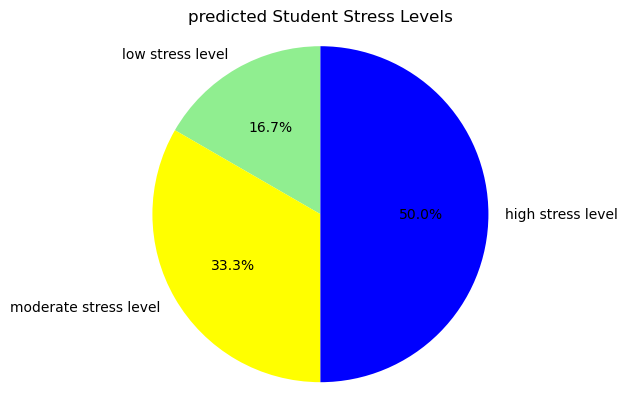

In [133]:

# Creating a pie chart with the 'x' argument (labels)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'yellow', 'blue'])
# Equal aspect ratio ensures that the pie chart is circular.
plt.axis('equal')
# Add a title
plt.title('predicted Student Stress Levels')
plt.show()

In [134]:
#finding correlation between anxiety and academic performance
correlation_anxiety_academic = df['anxiety_level'].corr(df['academic_performance'])
print("Correlation between anxiety level and academic performance:", correlation_anxiety_academic)

Correlation between anxiety level and academic performance: -0.6496011296145088


In [135]:
#importing Gradientboost classifier
from sklearn.ensemble import GradientBoostingClassifier

In [136]:
# Create a GradientBoostingClassifier object
gbc = GradientBoostingClassifier()

In [137]:
#fitting X_train,y_train in Gradient boost classifier
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [138]:
#predicting X_test value
pred_gbc = gbc.predict(X_test)

In [139]:
#finding Accuracy for Gradient boost classifier
gbc.score(X_test,y_test)

0.8636363636363636

In [140]:
#classification report for Gradientboost classifier
print(classification_report(y_test,pred))
model_comparision['GradientBoostingClassifier']=[accuracy_score(pred_gbc,y_test)]

              precision    recall  f1-score   support

           0       0.97      0.80      0.87       113
           1       0.91      0.87      0.89       115
           2       0.77      0.96      0.86       102

    accuracy                           0.87       330
   macro avg       0.88      0.88      0.87       330
weighted avg       0.89      0.87      0.87       330



In [141]:
#model Accuracy comparision of all the classifiers
Model_com_df=pd.DataFrame(model_comparision).T
Model_com_df.columns=['Model Accuracy']
Model_com_df=Model_com_df.sort_values(by='Model Accuracy',ascending=False)
Model_com_df.style.format("{:.2%}").background_gradient(cmap='Oranges')

,Model Accuracy
DecisionTreeClassifier,87.88%
RandomForestClassifier,87.88%
GaussianProcessclassifier,87.27%
GradientBoostingClassifier,86.36%
